<a href="https://colab.research.google.com/github/nmuraro/entregables/blob/main/docs/labs/Copia_de_lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08

**Objetivo**: Aplicar técnicas de **machine learning no supervisado** para explorar, procesar y analizar conjuntos de datos con variables numéricas y categóricas.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.


## Clustering


<img src="https://www.svgrepo.com/show/253022/car.svg" width = "300" align="center"/>



El conjunto de datos **`vehiculos_procesado_con_grupos.csv`** recopila información sobre diversas características relevantes de distintos vehículos. El propósito de este ejercicio es **clasificar los vehículos en diferentes categorías**, utilizando como base las variables descritas en la tabla de atributos.

El análisis presenta un desafío adicional debido a la **naturaleza mixta de los datos**: se incluyen tanto variables **numéricas** (ej. dimensiones, consumo, emisiones) como **categóricas** (ej. tipo de tracción, tipo de combustible), lo que requiere aplicar técnicas de preprocesamiento adecuadas antes de entrenar los modelos.

Como primer paso, procederemos a **cargar y explorar el conjunto de datos**, con el fin de familiarizarnos con su estructura y las características que servirán como base para la posterior clasificación.




**Descripción de los Datos:**

| **Nombre de la Columna**   | **Descripción**                                                                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **year**                   | El año en que el vehículo fue fabricado.                                                                                                          |
| **desplazamiento**          | La capacidad volumétrica del motor en litros. Indica la cantidad de aire y combustible que puede desplazar el motor durante una revolución.       |
| **cilindros**               | El número de cilindros que tiene el motor. Los cilindros son las cámaras donde ocurre la combustión interna en los motores de los vehículos.       |
| **co2**                     | Emisiones de dióxido de carbono del vehículo, medido en gramos por kilómetro. Es una medida de las emisiones de gases de efecto invernadero.       |
| **clase_tipo**              | La clase o tipo de vehículo, como vehículos especiales, deportivos, etc.                                                                         |
| **traccion_tipo**           | Tipo de tracción del vehículo, ya sea tracción en dos ruedas, en cuatro ruedas o en todas las ruedas.                                             |
| **transmision_tipo**        | Tipo de transmisión del vehículo, como automática, manual, entre otros.                                                                          |
| **combustible_tipo**        | Tipo de combustible que utiliza el vehículo, como gasolina, diésel, eléctrico, híbrido, etc.                                                     |
| **tamano_motor_tipo**       | Clasificación del tamaño del motor (por ejemplo, pequeño, mediano o grande), que generalmente se basa en la capacidad de desplazamiento.           |
| **consumo_tipo**            | Clasificación del nivel de consumo de combustible del vehículo, indicando si es alto, bajo, o muy alto.                                           |
| **co2_tipo**                | Clasificación de las emisiones de CO2 del vehículo, indicando si es alto, bajo, o muy alto.                                                       |
| **consumo_litros_milla**    | El consumo de combustible del vehículo, medido en litros por milla. Indica la eficiencia del vehículo en términos de consumo de combustible.        |



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline

sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

- Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.
- Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

- Junte ambos dataset en uno, llamado **df_procesado**.

In [ ]:
# Seleccionar solo las columnas numéricas
num_cols = ["year", "desplazamiento", "cilindros", "co2", "consumo_litros_milla"]
df_numerico = df[num_cols].copy()

# Rellenar NaNs con el promedio de cada columna
df_numerico = df_numerico.fillna(df_numerico.mean(numeric_only=True))

# Normalizar con MinMaxScaler
scaler = MinMaxScaler()
df_numerico_normalizado = pd.DataFrame(scaler.fit_transform(df_numerico), columns=num_cols)

# Seleccionar columnas categóricas
cat_cols = ["clase_tipo", "traccion_tipo", "transmision_tipo",
            "combustible_tipo", "tamano_motor_tipo", "consumo_tipo", "co2_tipo"]

df_categorico = df[cat_cols].copy()

# Transformar variables categóricas a numéricas usando one-hot encoding
df_categorico_codificado = pd.get_dummies(df_categorico, drop_first=False)

# Concatenar los dos dataframes
df_procesado = pd.concat([df_numerico_normalizado, df_categorico_codificado], axis=1)

# Ver las primeras filas del dataset procesado
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,0.000000,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0.029412,0.243590,0.142857,0.424351,0.360294,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,0.029412,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,0.088235,0.410256,0.285714,0.424351,0.360294,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# 1. Dividir en variables numéricas y categóricas
columnas_numericas = ['year', 'desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla']
columnas_categoricas = [col for col in df_procesado.columns if col not in columnas_numericas + ['cluster']]

# 2. Entrenar modelo KMeans (usando solo las columnas sin 'cluster')
X = df_procesado.drop(columns='cluster')

# 3. Ajustar KMeans con 8 clusters
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
df_procesado['cluster'] = kmeans.fit_predict(X)

# 4. Obtener centroides del modelo
centroides = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

# 5. Calcular resumen por cluster
# Promedios de variables numéricas
promedios_cluster = df_procesado.groupby('cluster')[columnas_numericas].mean().round(3)

# Modas de variables categóricas (True/False, one-hot encoded)
modas_cluster = df_procesado.groupby('cluster')[columnas_categoricas].agg(lambda x: x.mode().iloc[0])

# 6. Unir resultados en un solo resumen
resumen_cluster = pd.concat([promedios_cluster, modas_cluster], axis=1)

# 7. Mostrar resumen
display(resumen_cluster)  # O usa print(resumen_cluster) si display no está disponible




,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.427,0.224,0.174,0.305,0.226,False,False,False,False,True,...,False,True,False,False,False,False,True,False,False,False
1,0.569,0.170,0.146,0.241,0.156,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,0.408,0.331,0.257,0.354,0.282,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,0.477,0.451,0.327,0.410,0.343,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
4,0.384,0.586,0.431,0.510,0.455,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
5,0.589,0.362,0.300,0.354,0.282,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
6,0.452,0.563,0.406,0.502,0.443,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
7,0.580,0.270,0.210,0.305,0.226,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

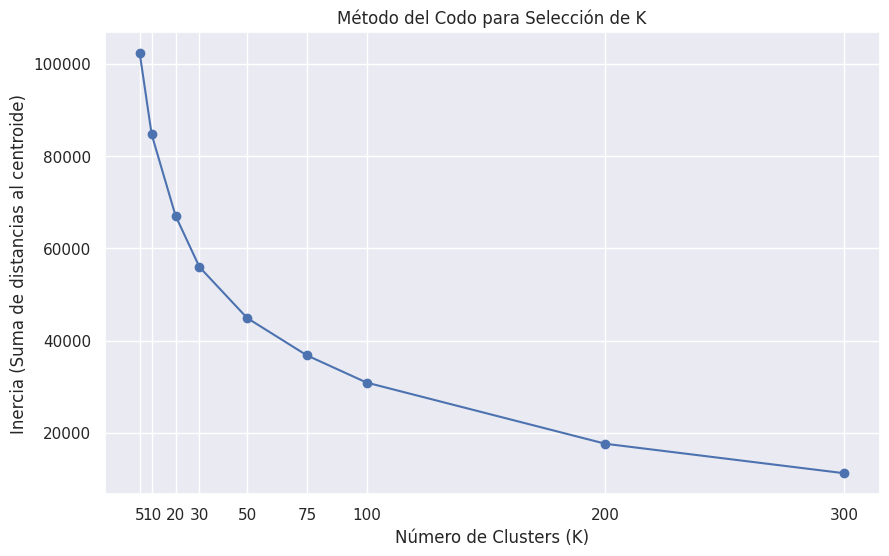

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# 1. Selección de columnas numéricas (no incluimos 'cluster')
X = df_procesado.drop(columns=["cluster"], errors="ignore")

# 2. Definir valores de k a evaluar
k_values = [5, 10, 20, 30, 50, 75, 100, 200, 300]
inertia = []

# 3. Entrenar KMeans para cada valor de k y guardar inercia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# 4. Graficar la inercia vs número de clusters
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Método del Codo para Selección de K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inercia (Suma de distancias al centroide)")
plt.grid(True)
plt.xticks(k_values)
plt.show()


Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

## Reducción de Dimensionalidad

<img src="https://1000logos.net/wp-content/uploads/2020/11/Wine-Logo-old.png" width = "300" align="center"/>


Para este ejercicio utilizaremos el **Wine Dataset**, un conjunto de datos clásico disponible en la librería **scikit-learn** y en el repositorio de la **UCI Machine Learning**.
Este dataset contiene información de **178 muestras de vino** provenientes de la región italiana de *Piamonte*. Cada vino pertenece a una de **tres variedades de uva** (*clases*), que actúan como etiquetas para el análisis supervisado, pero aquí se usarán solo como referencia en la visualización.

Cada muestra está descrita por **13 variables químicas** obtenidas de un análisis de laboratorio, entre ellas:

* **Alcohol**: porcentaje de alcohol en el vino.
* **Malic acid**: concentración de ácido málico.
* **Ash**: contenido de ceniza.
* **Alcalinity of ash**: alcalinidad de la ceniza.
* **Magnesium**: cantidad de magnesio (mg/L).
* **Total phenols**: concentración total de fenoles.
* **Flavanoids**: tipo de fenoles con propiedades antioxidantes.
* **Nonflavanoid phenols**: fenoles que no son flavonoides.
* **Proanthocyanins**: compuestos relacionados con el color y el sabor.
* **Color intensity**: intensidad del color del vino.
* **Hue**: matiz del color.
* **OD280/OD315 of diluted wines**: relación de absorbancia que mide la calidad del vino.
* **Proline**: concentración de prolina (un aminoácido).

Estas características permiten representar cada vino como un punto en un espacio de **13 dimensiones**.

El objetivo del análisis con este dataset es **reducir la dimensionalidad** para visualizar y explorar patrones en los datos. Para ello aplicaremos:

* **PCA (Principal Component Analysis):** identificar las combinaciones lineales de variables que explican la mayor varianza en el conjunto.
* **t-SNE (t-distributed Stochastic Neighbor Embedding):** mapear las muestras a 2D o 3D, preservando relaciones de vecindad y estructuras no lineales.

La comparación entre ambas técnicas permitirá observar cómo las tres clases de vinos se diferencian en el espacio reducido y discutir la utilidad de la reducción de dimensionalidad en datos con mayor número de variables que en el caso del dataset Iris.



In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
# cargar dataset
dataset = load_wine()

# nombres de las variables
features = dataset.feature_names
target = 'wine_class'

# construir DataFrame
wine = pd.DataFrame(dataset.data, columns=features)
wine[target] = dataset.target

# ver primeras filas
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0




### 1. **Análisis detallado con PCA**

* Calcular la **varianza explicada** por cada componente principal y representar el gráfico de varianza acumulada, identificando cuántos componentes son necesarios para capturar al menos el **90–95% de la información**.
* Construir tablas y gráficos que muestren cómo las observaciones (vinos) se proyectan en las primeras componentes principales.
* Analizar los **loadings** (coeficientes de cada variable en los componentes) e interpretar qué características químicas del vino (alcohol, fenoles, color, etc.) tienen mayor influencia en las nuevas dimensiones.
* Visualizar los datos reducidos a 2D o 3D e interpretar si las **tres variedades de vino** se separan de forma clara en el espacio proyectado.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
X = dataset.data
y = dataset.target

# PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Crear DataFrame de varianzas
var_explicada = pca.explained_variance_ratio_
var_acumulada = var_explicada.cumsum()
df_varianza = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(var_explicada))],
    'Varianza Explicada': var_explicada,
    'Varianza Acumulada': var_acumulada
})
print(df_varianza)

   Componente  Varianza Explicada  Varianza Acumulada
0         PC1        9.980912e-01            0.998091
1         PC2        1.735916e-03            0.999827
2         PC3        9.495896e-05            0.999922
3         PC4        5.021736e-05            0.999972
4         PC5        1.236368e-05            0.999985
5         PC6        8.462130e-06            0.999993
6         PC7        2.806815e-06            0.999996
7         PC8        1.523081e-06            0.999997
8         PC9        1.127830e-06            0.999999
9        PC10        7.214158e-07            0.999999
10       PC11        3.780603e-07            1.000000
11       PC12        2.120138e-07            1.000000
12       PC13        8.253928e-08            1.000000


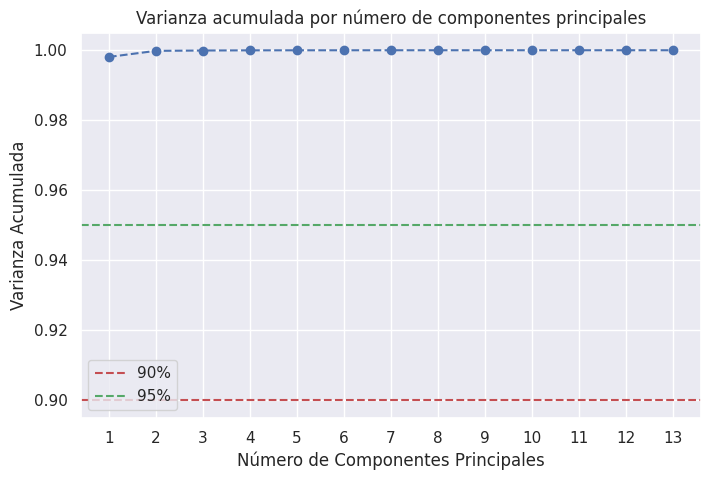

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(var_acumulada)+1), var_acumulada, marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='r', linestyle='--', label='90%')
plt.axhline(y=0.95, color='g', linestyle='--', label='95%')
plt.title('Varianza acumulada por número de componentes principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.xticks(range(1, len(var_acumulada)+1))
plt.legend()
plt.grid(True)
plt.show()


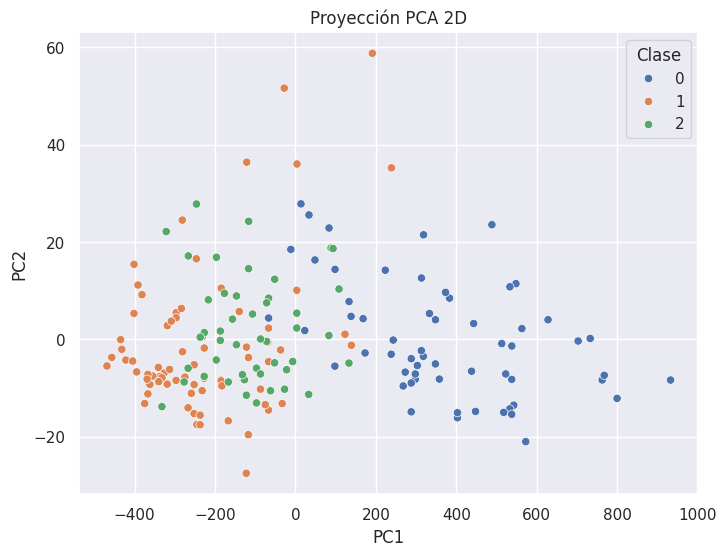

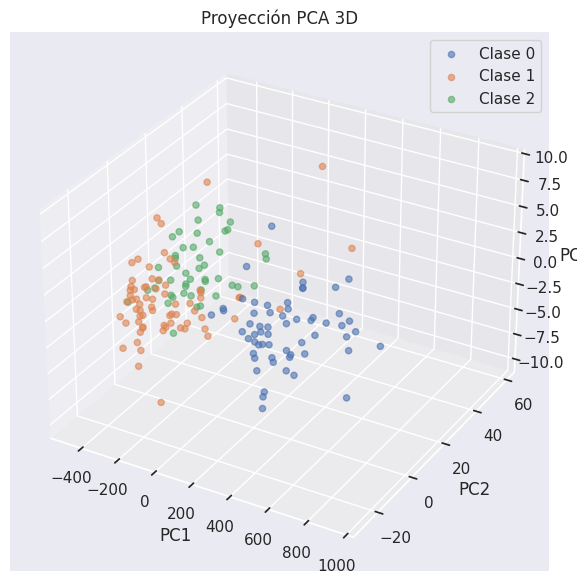

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Crear DataFrames para visualización
df_proj_2d = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
df_proj_2d['Clase'] = y

df_proj_3d = pd.DataFrame(X_pca[:, :3], columns=['PC1', 'PC2', 'PC3'])
df_proj_3d['Clase'] = y

# Gráfico 2D
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_proj_2d, x='PC1', y='PC2', hue='Clase', palette='deep')
plt.title('Proyección PCA 2D')
plt.grid(True)
plt.show()

# Gráfico 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']
for label in df_proj_3d['Clase'].unique():
    cluster = df_proj_3d[df_proj_3d['Clase'] == label]
    ax.scatter(cluster['PC1'], cluster['PC2'], cluster['PC3'], label=f'Clase {label}', alpha=0.6)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Proyección PCA 3D')
ax.legend()
plt.show()




### 2. **Análisis detallado con t-SNE**

* Aplicar **t-SNE** para reducir los datos a 2 dimensiones, probando diferentes configuraciones de hiperparámetros como *perplexity* y *learning rate*.
* Comparar las distintas visualizaciones obtenidas y discutir cómo los hiperparámetros afectan la estructura de los clústeres.
* Analizar si las **tres clases de vinos** forman agrupaciones definidas y si t-SNE logra capturar relaciones no lineales que PCA no refleja.



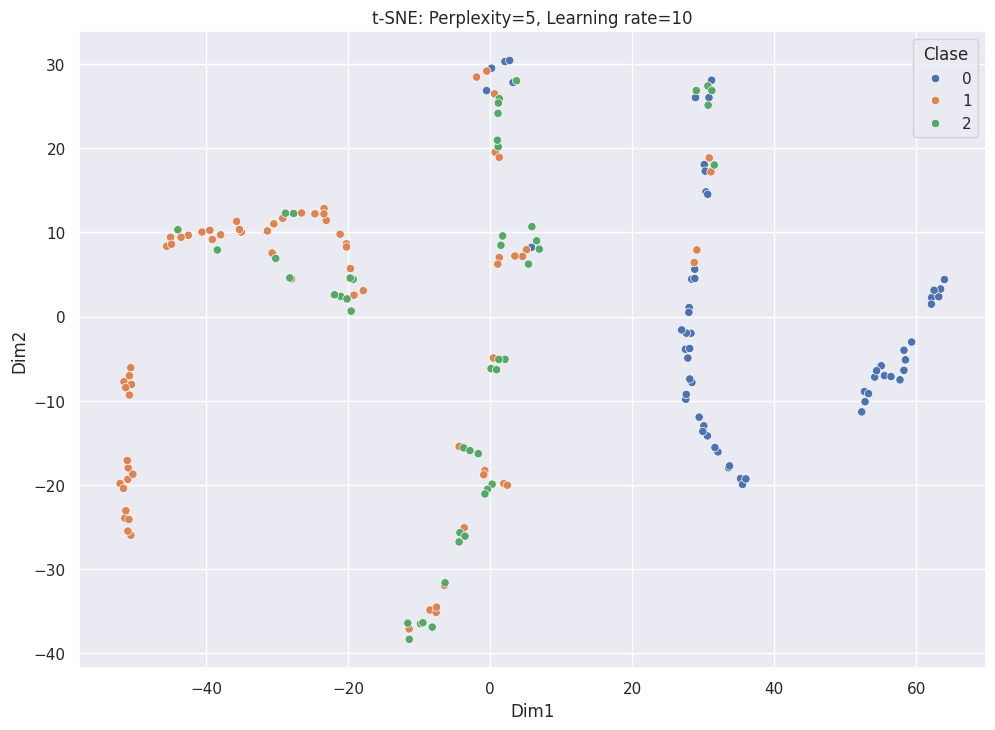

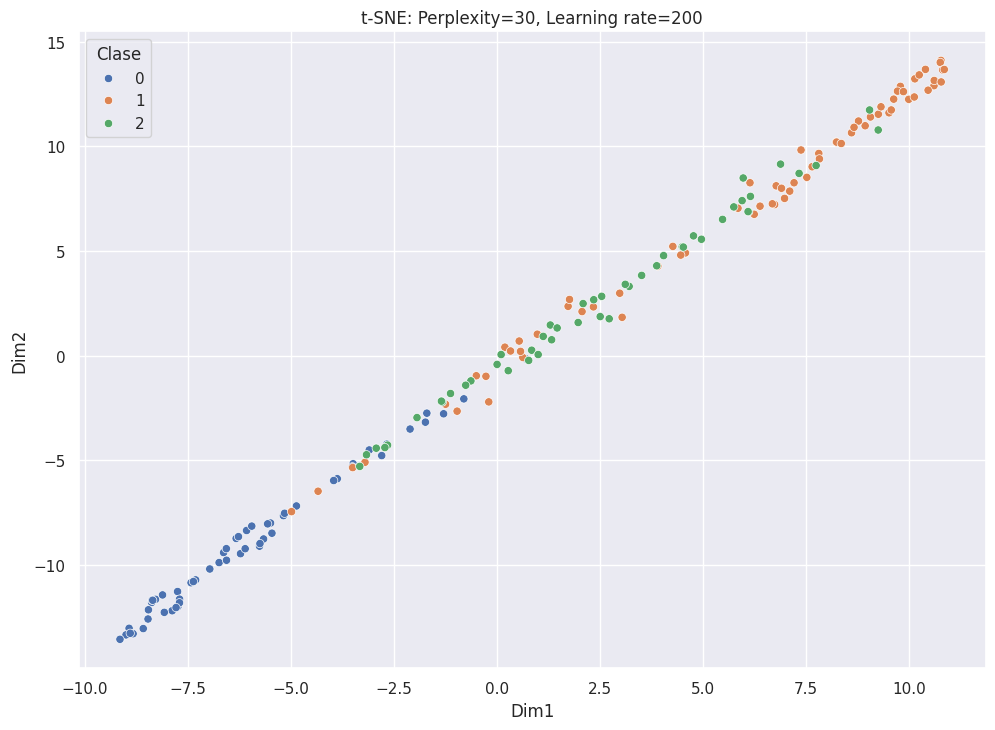

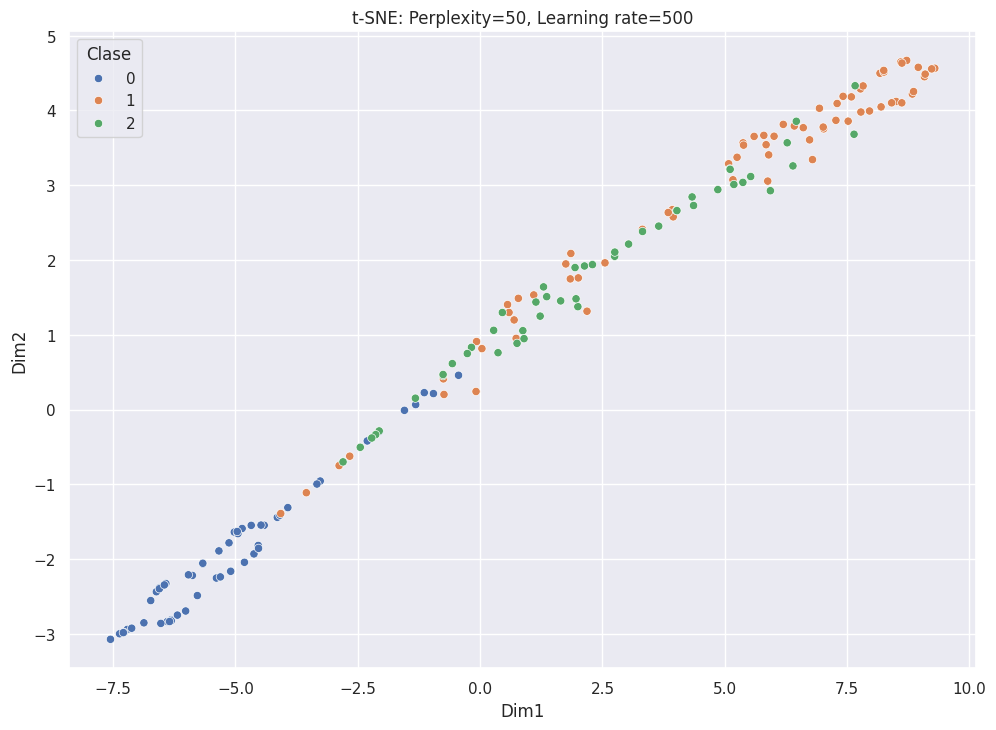

In [ ]:
# Probar combinaciones de perplexity y learning_rate
parametros = [
    {"perplexity": 5, "learning_rate": 10},
    {"perplexity": 30, "learning_rate": 200},
    {"perplexity": 50, "learning_rate": 500}
]

for i, params in enumerate(parametros, start=1):
    tsne = TSNE(n_components=2, perplexity=params["perplexity"], learning_rate=params["learning_rate"], random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Construir DataFrame para visualización
    df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
    df_tsne['Clase'] = y

    # Graficar
    plt.figure()
    sns.scatterplot(data=df_tsne, x='Dim1', y='Dim2', hue='Clase', palette='deep')
    plt.title(f't-SNE: Perplexity={params["perplexity"]}, Learning rate={params["learning_rate"]}')
    plt.show()




### 3. **Comparación entre PCA y t-SNE**

* Contrastar las visualizaciones y discutir las **ventajas y limitaciones** de cada técnica:

  * PCA como método **lineal** para interpretar varianza y relaciones globales.
  * t-SNE como método **no lineal** que preserva relaciones locales y vecindades.
* Evaluar en qué escenarios prácticos sería más recomendable usar PCA (interpretabilidad, reducción previa para modelos) o t-SNE (exploración y visualización de clústeres).
* Reflexionar sobre la **importancia de la reducción de dimensionalidad** en datasets de alta dimensión como Wine, destacando su utilidad para:

  * Visualizar patrones ocultos en los datos.
  * Reducir complejidad y ruido antes de aplicar algoritmos de aprendizaje automático.
  * Facilitar la interpretación y comunicación de resultados.



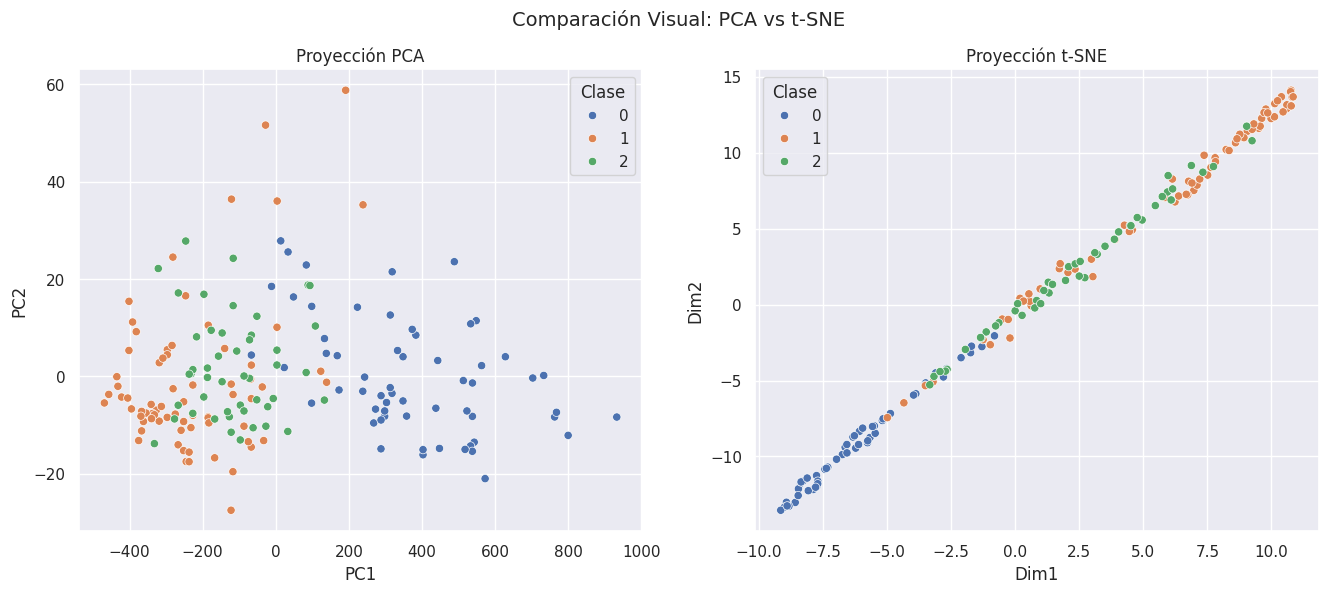

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# PCA
X_pca = PCA(n_components=2).fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Clase'] = y

# t-SNE
X_tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42).fit_transform(X)
df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['Clase'] = y

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Clase', ax=axs[0], palette='deep')
axs[0].set_title('Proyección PCA')

sns.scatterplot(data=df_tsne, x='Dim1', y='Dim2', hue='Clase', ax=axs[1], palette='deep')
axs[1].set_title('Proyección t-SNE')

plt.suptitle("Comparación Visual: PCA vs t-SNE", fontsize=14)
plt.show()


El Análisis de Componentes Principales (PCA) es una técnica lineal que proyecta los datos sobre ejes ortogonales que maximizan la varianza. Esto lo hace especialmente útil en los siguientes escenarios:

Interpretabilidad: Las componentes principales son combinaciones lineales de las variables originales, lo cual permite identificar qué atributos explican mayor variabilidad. Ideal para análisis exploratorios en ciencias, economía o ingeniería.

Reducción previa a modelamiento: PCA permite reducir la dimensión del dataset sin perder mucha información, lo que puede acelerar algoritmos de Machine Learning, como SVM o regresión logística, al eliminar colinealidad o ruido.

Preprocesamiento para clustering: cuando se aplican métodos como K-Means, PCA puede ayudar a reducir ruido e inicializar mejor los centros.

t-SNE es un algoritmo no lineal diseñado para representar relaciones de vecindad local en espacios de baja dimensión. Es altamente recomendado cuando:

Se busca visualizar clústeres o estructuras complejas en los datos, especialmente en clasificación no supervisada.

Se desea entender patrones de agrupación o separación de clases que no son evidentes en PCA.

Se trabaja con datos de alta dimensión no lineal (texto embebido, imágenes, genómica, etc.).

n datasets como Wine, con 13 variables numéricas, la reducción de dimensionalidad cumple un rol clave:

Visualizar patrones ocultos: Las clases de vino no son fácilmente separables en 13D, pero técnicas como PCA y t-SNE permiten explorar agrupaciones y tendencias.

Reducir ruido y complejidad: Al eliminar redundancia y variables irrelevantes, se mejora la eficiencia de los modelos y se evitan sobreajustes.

Facilitar la interpretación: Es más fácil comunicar hallazgos visuales en 2D o 3D a audiencias técnicas y no técnicas.

Preparar datos para modelado: PCA es útil como paso previo para aplicar clustering, regresión o clasificación con mejores tiempos y generalización.

PCA logró separar parcialmente las clases de vino, identificando direcciones lineales de mayor varianza.

t-SNE, una vez ajustado correctamente, permitió una separación más clara y no lineal entre las clases, evidenciando su potencia para descubrir relaciones más complejas.

Ambas técnicas son complementarias y deben elegirse según el objetivo del análisis: comprensión e interpretación (PCA) o exploración visual (t-SNE).